# FCC Visualisation code

### Timeseries plot

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from collections import OrderedDict
import ipywidgets as widgets
%matplotlib inline

#### Class to navigate to the csv data from jupyter stolen from https://gist.github.com/DrDub/6efba6e522302e43d055

class FileBrowser(object):
    def __init__(self):
        self.path = os.getcwd()
        self._update_files()
        
    def _update_files(self):
        self.files = list()
        self.dirs = list()
        if(os.path.isdir(self.path)):
            for f in os.listdir(self.path):
                ff = self.path + "/" + f
                if os.path.isdir(ff):
                    self.dirs.append(f)
                else:
                    self.files.append(f)
        
    def widget(self):
        box = widgets.VBox()
        self._update(box)
        return box
    
    def _update(self, box):
        
        def on_click(b):
            if b.description == '..':
                self.path = os.path.split(self.path)[0]
            else:
                self.path = self.path + "/" + b.description
            self._update_files()
            self._update(box)
        
        buttons = []
        if self.files:
            button = widgets.Button(description='..', background_color='#d0d0ff')
            button.on_click(on_click)
            buttons.append(button)
        for f in self.dirs:
            button = widgets.Button(description=f, background_color='#d0d0ff')
            button.on_click(on_click)
            buttons.append(button)
        for f in self.files:
            button = widgets.Button(description=f)
            button.on_click(on_click)
            buttons.append(button)
        box.children = tuple([widgets.HTML("<h2>%s</h2>" % (self.path,))] + buttons)

f = FileBrowser()
f.widget()

In [2]:
#### Loading the data and setting datetime index

def load_csv_data(path):
    df = pd.read_csv(path)
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S UTC')
    df = df.set_index('timestamp')
    df = df.apply(pd.to_numeric, errors='coerce', axis=0)
    return df


df = load_csv_data(f.path)


In [3]:
#### Labeling the dataframe according to time of day

df['hour'] = [x.hour for x in df.index]
df['minutes'] = [x.minute for x in df.index]
df['idx'] = range(1, len(df) + 1)

df.set_value(df.between_time('6:00', '11:59').index,'time_of_day', 'Morning')
df.set_value(df.between_time('12:00', '17:00').index,'time_of_day', 'Afternoon')
df.set_value(df.between_time('17:01', '20:00').index,'time_of_day', 'Evening')
df.set_value(df.between_time('20:01', '5:59').index,'time_of_day', 'Night')
df.head()

/Users/tbantis/Desktop/pr3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/Users/tbantis/Desktop/pr3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/tbantis/Desktop/pr3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/tbantis/Desktop/pr3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,ir temperature in ºC (SHT 31),humidity in % (SHT 31),atmospheric pressure in kPa (MPL3115A25),light in Lux (BH1730FVC),PM 1 in ug/m3 (PMS 5003),PM 10 in ug/m3 (PMS 5003),PM 2.5 in ug/m3 (PMS 5003),CO in kOhm (MICS 4514),NO2 in kOhm (MICS 4514),battery in % (Battery SCK 2.0),hour,minutes,idx,time_of_day
timestamp,,,,,,,,,,,,,,
2018-08-30 10:40:00,27.402,58.758,101.954,557.990,12.8,20.8,19.2,153.486,260.516,1.6,10,40,1,Morning
2018-08-30 10:50:00,27.320,56.284,101.995,583.445,15.4,25.1,22.7,93.470,341.006,7.3,10,50,2,Morning
2018-08-30 11:00:00,27.468,54.695,102.022,676.843,16.8,26.3,25.0,71.706,362.963,15.5,11,0,3,Morning
2018-08-30 11:10:00,27.751,53.392,102.040,663.961,17.0,28.3,25.8,52.996,370.418,23.3,11,10,4,Morning
2018-08-30 11:20:00,27.887,53.312,102.060,784.610,14.0,23.2,21.4,51.772,373.607,30.9,11,20,5,Morning


In [4]:
#### Get time of day indices for plotting 

def get_tod_indices(df, tod):
    a = df.reset_index().groupby('time_of_day')['idx'].apply(np.array)
    lst = a[np.argmax(a.index == tod)]
    l = []
    start_index = 0
    for k in range(1, len(lst)):
        if lst[k] - lst[k-1] > 1:
            end_index = k
            l.append((lst[start_index], lst[end_index-1]))
            start_index = k
    l.append((lst[start_index], lst[len(lst)-1]))
    return l


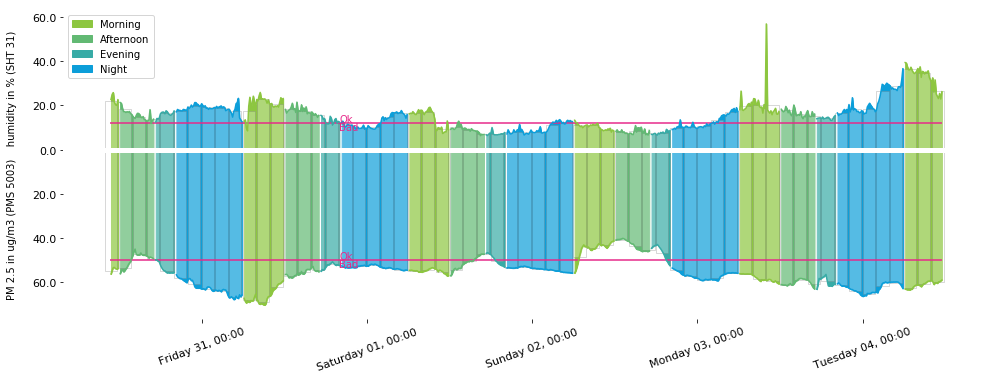

In [5]:
fig, ax = plt.subplots(1,1)

#### iSCAPE colors
colors = ['#8DC640', '#62B973', '#37ABA6', '#0C9ED9']

#### Plot timeseries. time_freq is a pandas timegrouper argument for the bars
def time_series_plot(df, variable1, variable2, threshold1, threshold2, time_freq):
    for k, i in enumerate(df.time_of_day.unique()):
        for j in get_tod_indices(df, i):
            plt.plot(df[variable1].iloc[j[0]:j[1]].index,
                             df[variable1].iloc[j[0]:j[1]], color = colors[k])
            plt.fill_between(df[variable1].iloc[j[0]:j[1]].index,
                             df[variable1].iloc[j[0]:j[1]], color = colors[k], alpha = 1, label = i)

            plt.plot(df[variable2].iloc[j[0]:j[1]].index,
                         -df[variable2].iloc[j[0]:j[1]], color = colors[k])
            plt.fill_between(df[variable2].iloc[j[0]:j[1]].index,
                         -df[variable2].iloc[j[0]:j[1]], color = colors[k], alpha = 1)

    plt.bar(x = df.groupby(pd.Grouper(freq=time_freq)).mean()[variable1].index,
            height=df.groupby(pd.Grouper(freq=time_freq)).mean()[variable1],
            width = 1/len(df.groupby(pd.Grouper(freq=time_freq)).mean()[variable1].index) *4.5,
            facecolor='white',
            edgecolor='gray',
            align = 'edge',
            alpha=0.3, 
            joinstyle='round')
    
    plt.bar(x = df.groupby(pd.Grouper(freq=time_freq)).mean()[variable2].index,
            height=-df.groupby(pd.Grouper(freq=time_freq)).mean()[variable2],
            width = 1/len(df.groupby(pd.Grouper(freq=time_freq)).mean()[variable2].index) *4.5,
            facecolor='white',
            edgecolor='gray',
            align = 'edge',
            alpha=0.3, 
            joinstyle='round')
    
    plt.axhline(y=0, color='white', linestyle='-',linewidth=5)
    plt.hlines(threshold1,df.index[0], df.index[len(df)-1], color='#e7298a', linestyle='-')
    plt.hlines(-threshold2,df.index[0], df.index[len(df)-1], color='#e7298a', linestyle='-')

    plt.text(df.index[200], threshold1-2, 'Bad', ha='left', va='center', color='#e7298a')
    plt.text(df.index[200], threshold1+2, 'Ok', ha='left', va='center', color='#e7298a')

    plt.text(df.index[200], -threshold2 +2, 'Ok', ha='left', va='center', color='#e7298a')
    plt.text(df.index[200], -threshold2 -2, 'Bad', ha='left', va='center', color='#e7298a')

    plt.box(on=None)

    ax.tick_params(axis='x', labelsize=11, rotation = 20)
    ax.tick_params(axis='y', labelsize=11)
    labels=ax.get_yticks()
    ax.set_yticklabels(np.abs(labels))

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))    
    plt.legend(list(by_label.values())[-4:], list(by_label.keys())[-4:])

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%A %d, %H:%M'))

    ax.yaxis.set_label_coords(-0.05,0.5)
    plt.ylabel(variable1+'    '+variable2)
    
    ## A4 width dimension. Height can be adjustable
    fig.set_size_inches(16.53,5.69)
    fig.savefig('iscape.png')

time_series_plot(df, 'PM 2.5 in ug/m3 (PMS 5003)','humidity in % (SHT 31)', 12, 50, time_freq = '2H')